In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.cm as cm
from scipy import stats

from metric import CE, mCE, RelativeRobustness,ece_score,ECE, rCE, mrCE




def get_corruption_list(dataset):

    if dataset == 'cifar':
    
        Corruptions_list = ['brightness','contrast','defocus_blur','elastic_transform',
                'fog','frost','gaussian_blur','gaussian_noise','glass_blur',
                  'impulse_noise','jpeg_compression','motion_blur','pixelate','saturate',
                  'shot_noise','snow','spatter','speckle_noise','zoom_blur']
    elif dataset == 'ImageNet_C':
    
        Corruptions_list = ['brightness','contrast','defocus_blur','elastic_transform',
                'fog','frost','gaussian_noise','glass_blur',
                  'impulse_noise','jpeg_compression','motion_blur','pixelate',
                  'shot_noise','snow', 'zoom_blur']
    elif dataset == 'ImageNet_C_bar':
        Corruptions_list = ['blue_noise_sample','brownish_noise','caustic_refraction','checkerboard_cutout',
                            'cocentric_sine_waves','inverse_sparkles','perlin_noise','plasma_noise',
                            'single_frequency_greyscale','sparkles']
    elif dataset == 'ImageNet_3DCC':
        Corruptions_list = ['near_focus', 'far_focus', 'fog_3d', 'flash', 'color_quant', 'low_light',
                             'xy_motion_blur', 'z_motion_blur', 'iso_noise', 'bit_error', 'h265_abr']
    elif dataset == 'ImageNet_P':
        Corruptions_list = ['brightness','gaussian_noise', 'motion_blur','rotate','scale','shot_noise','snow', 'tilt', 'translate',  'zoom_blur'
                                                        #  ',spatter',   'speckle_noise', 'gaussian_blur',  'shear'
                             ]

    
    return Corruptions_list


def get_acc(csv_test, corruption):
    resutls_test = pd.read_csv(csv_test)

    Corruptions_list = resutls_test['Corruption']
    Corruptions_list = list(Corruptions_list)

    acc_test = []
    if corruption in Corruptions_list:
        corruption_i = Corruptions_list.index(corruption)
        for severity in range(5):
            acc_test.append(resutls_test.loc[corruption_i,'Acc_s'+str(severity+1)])
           

    return sum(acc_test)/len(acc_test)


def get_mCE(csv_test,csv_base,corruption):
    resutls_test = pd.read_csv(csv_test)
    resutls_baseline = pd.read_csv(csv_base)

    Corruptions_list = resutls_test['Corruption']
    Corruptions_list = list(Corruptions_list)

    x = [1,2,3,4,5]
    mCEs = []
    if corruption in Corruptions_list:
        err_test = []
        err_baseline = []
        corruption_i = Corruptions_list.index(corruption)
        for severity in range(5):
            err_test.append(100-resutls_test.loc[corruption_i,'Acc_s'+str(severity+1)])
            err_baseline.append(100-resutls_baseline.loc[corruption_i,'Acc_s'+str(severity+1)])

        CE_i = CE(err_test,err_baseline)
        mCEs.append(CE_i)
    result_mCE = mCE(mCEs)
    return result_mCE*100.0

def get_rCE(csv_test,csv_base, err_test, err_clean,corruption):
    resutls_test = pd.read_csv(csv_test)
    resutls_baseline = pd.read_csv(csv_base)

    Corruptions_list = resutls_test['Corruption']
    Corruptions_list = list(Corruptions_list)

    x = [1,2,3,4,5]
    rCEs = []
    err_test_clean = [err_test,err_test,err_test,err_test,err_test] # change for a different test model
    err_baseline_clean = [err_clean,err_clean,err_clean,err_clean,err_clean]
    if corruption in Corruptions_list:
        err_test = []
        err_baseline = []
        corruption_i = Corruptions_list.index(corruption)
        for severity in range(5):
            err_test.append(100-resutls_test.loc[corruption_i,'Acc_s'+str(severity+1)])
            err_baseline.append(100-resutls_baseline.loc[corruption_i,'Acc_s'+str(severity+1)])

        RCE = rCE(err_test,err_baseline,err_test_clean,err_baseline_clean)
        rCEs.append(RCE)
    result_rCE = mrCE(rCEs)
    return result_rCE*100.0


def get_ece(csv_test,csv_base,corruption):
    resutls_test = pd.read_csv(csv_test)
    resutls_baseline = pd.read_csv(csv_base)

    Corruptions_list = resutls_test['Corruption']
    Corruptions_list = list(Corruptions_list)
 
    eces = []
    if corruption in Corruptions_list:
        ece_test = []
        ece_baseline = []
        corruption_i = Corruptions_list.index(corruption)
        for severity in range(5):
            ece_test.append(resutls_test.loc[corruption_i,'ECE_s'+str(severity+1)])
            ece_baseline.append(resutls_baseline.loc[corruption_i,'ECE_s'+str(severity+1)])

        ece_i = sum(ece_test) / sum(ece_baseline) 
        eces.append(ece_i)
    result_ECE = sum(eces)/len(eces)
    return result_ECE


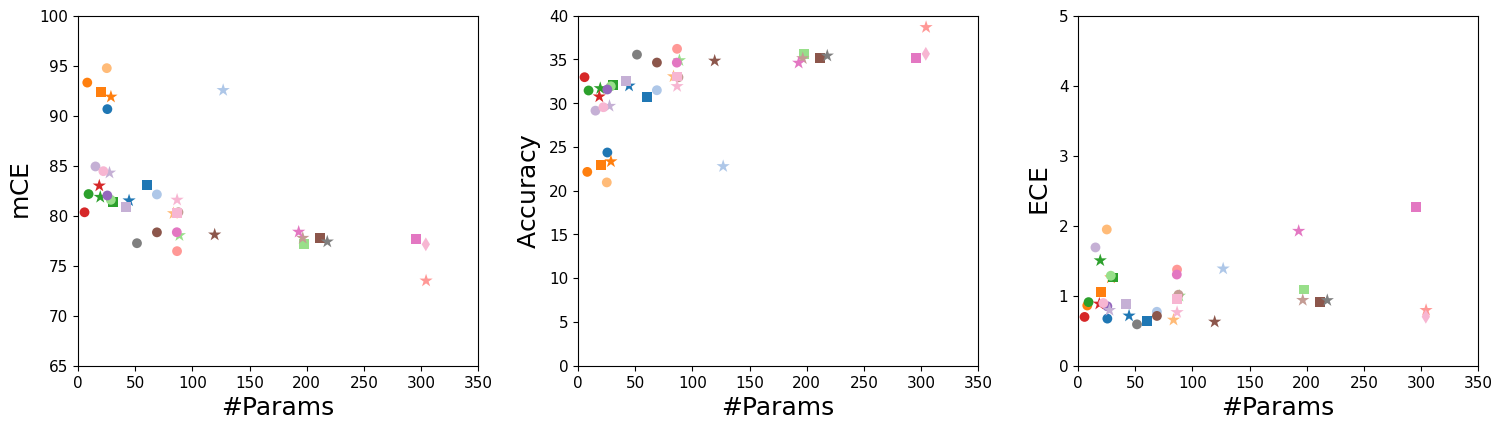

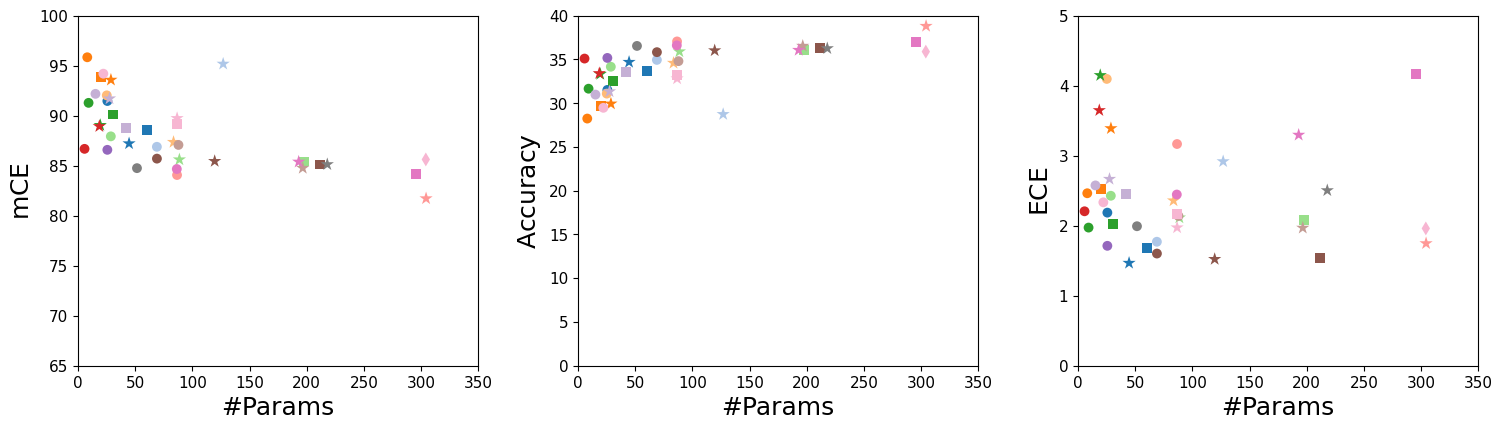

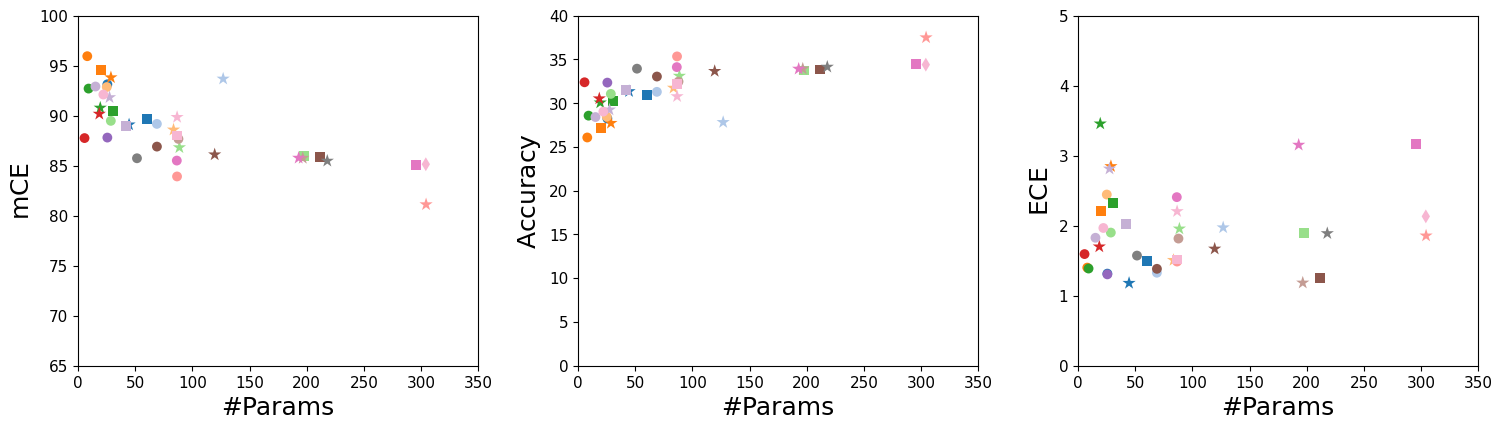

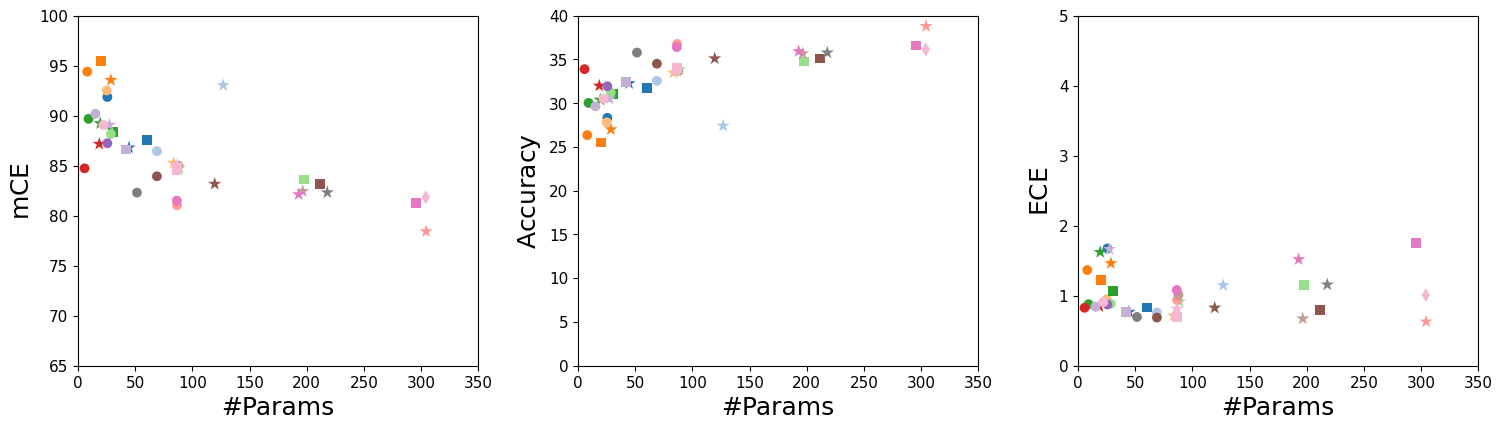

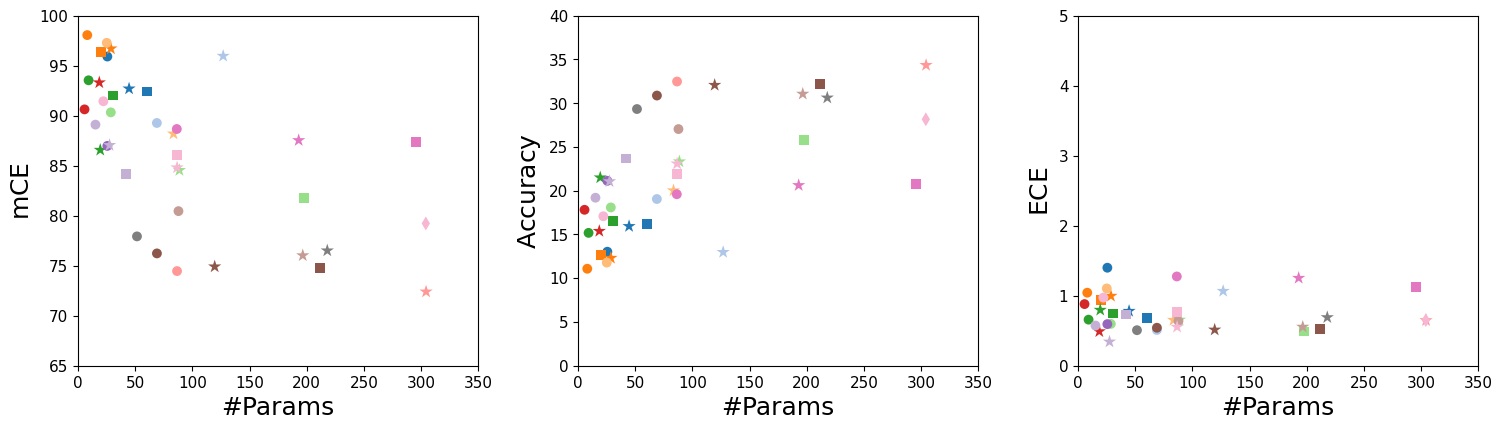

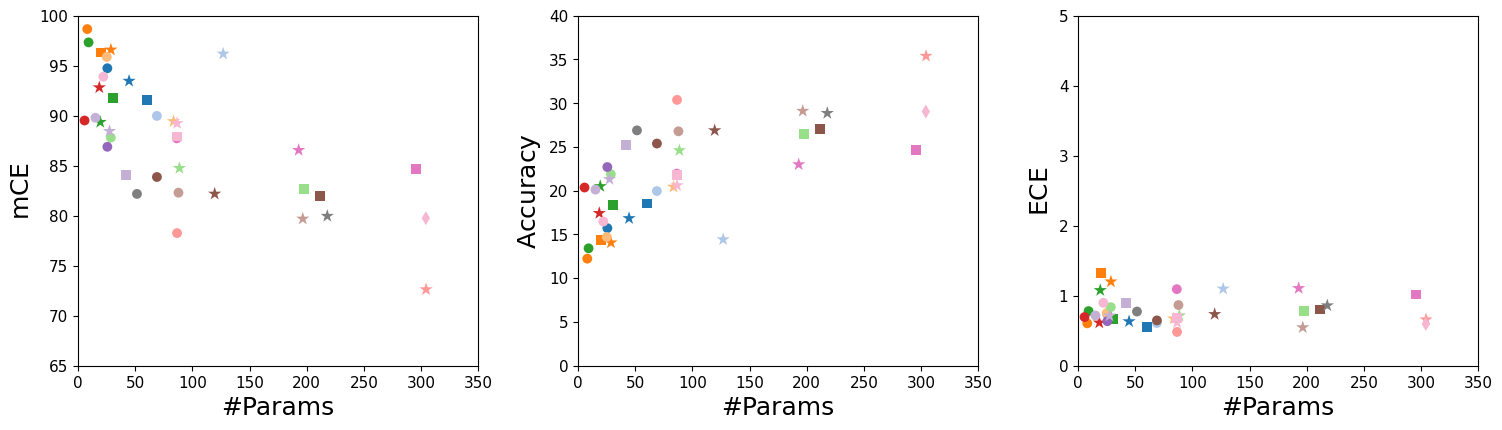

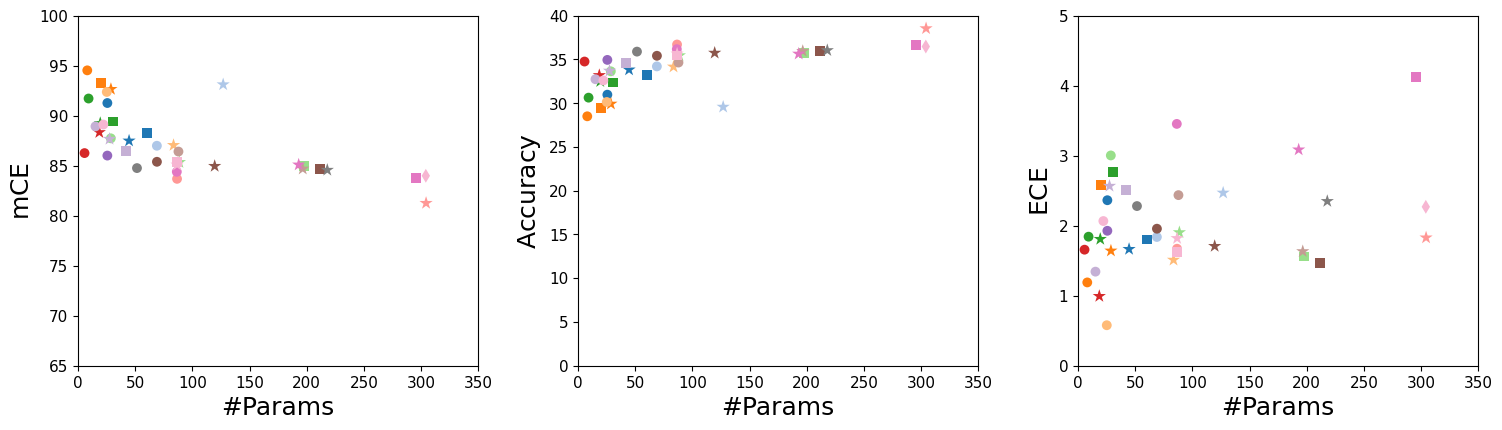

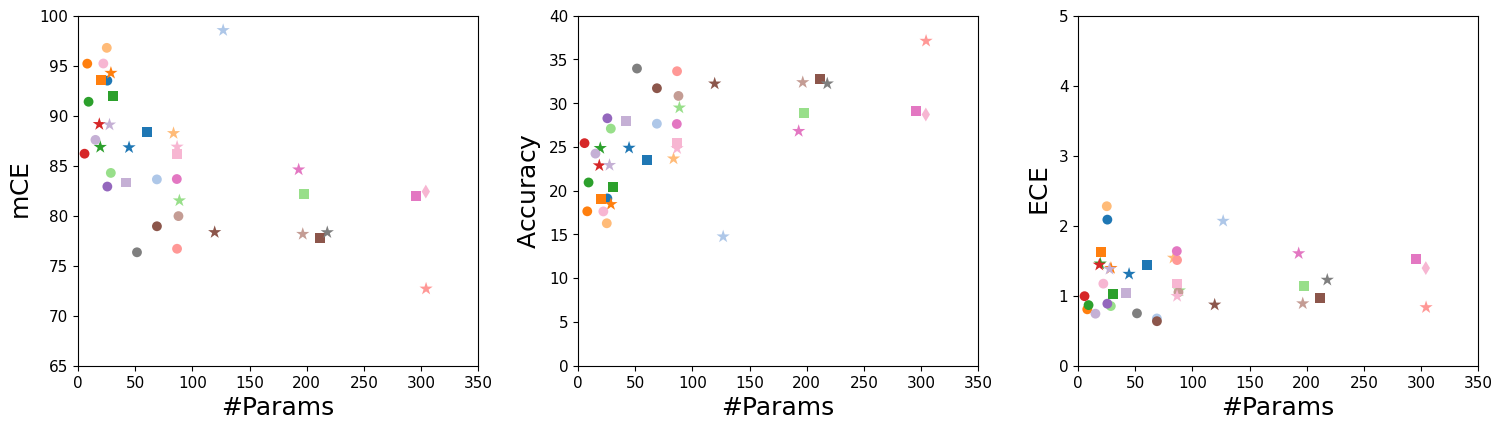

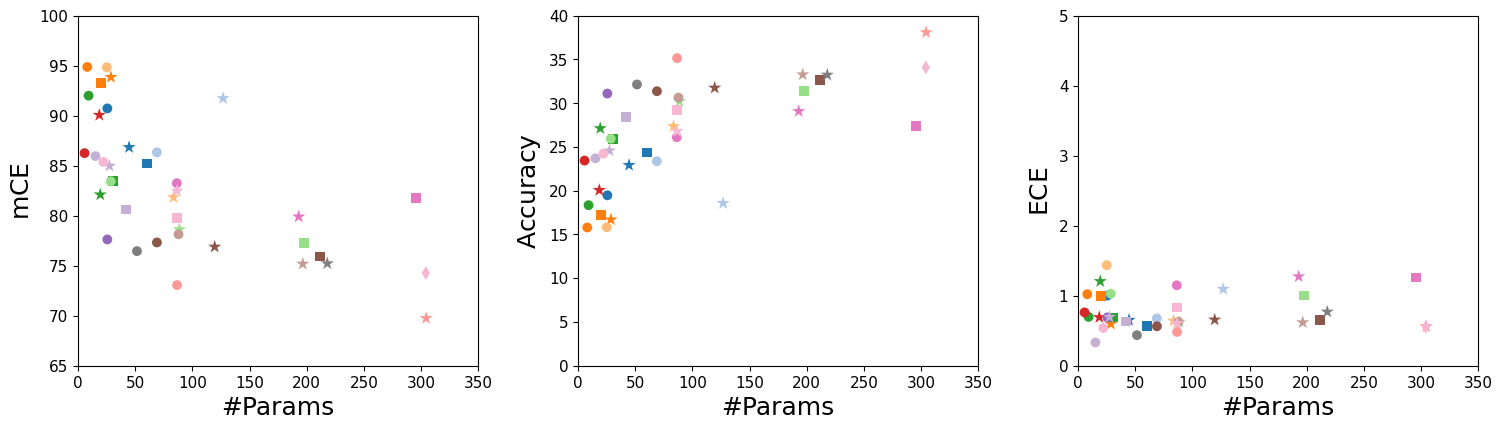

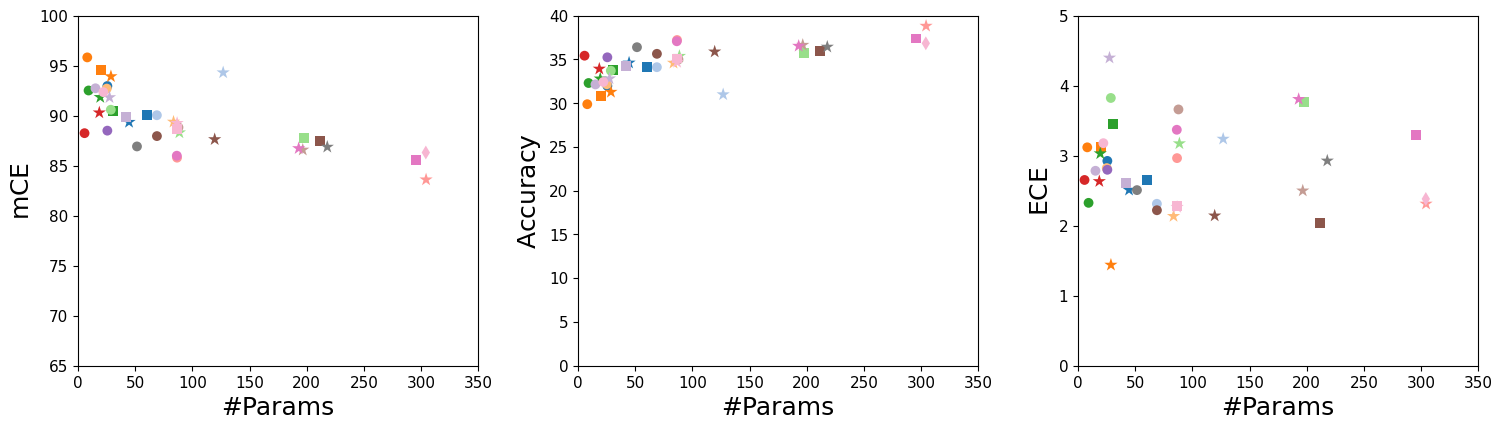

In [18]:
dataset = 'ImageNet_C_bar'
corruptions =  get_corruption_list(dataset)
for c_i in corruptions:
    models = {'ResNet': {'model': ['ResNet50', 'ResNet101','ResNet152'], 
                     'timm_model': ['resnet50', 'resnet101', 'resnet152'],
                     'params': [25.557,44.549,60.193],
                     'mCE': [], 'acc': [], 'ECE': []
                     },

          'WRN': {'model': ['WRN50-2','WRN101-2'], 
                  'timm_model': ['wide_resnet50_2', 'wide_resnet101_2',],
                     'params': [68.883,126.887],
                     'mCE': [ ], 'acc': [], 'ECE': []
                    },

          'DenseNet': {'model': ['DenseNet121','DenseNet161','DenseNet201'], 
                       'timm_model': ['densenet121', 'densenet161', 'densenet201'],
                     'params': [7.979,28.681,20.014],
                     'mCE': [], 'acc': [], 'ECE': []
                    },
          'ResNeXt': {'model': ['ResNeXt50d (32×4d)', 'ResNeXt101 (64×4d)'], 
                      'timm_model': ['resnext50d_32x4d', 'resnext101_64x4d',],
                     'params': [25.048,83.455],
                     'mCE': [], 'acc': [], 'ECE': []
                     },
          'EfficientNet': {'model': ['EfficientNet-B2','EfficientNet-B4','EfficientNet-B5'], 
                           'timm_model': ['efficientnet_b2', 'efficientnet_b4', 'efficientnet_b5',],
                     'params': [9.11,19.342,30.39],
                     'mCE': [], 'acc': [], 'ECE': []
                     },
          'ConvNext': {'model': ['ConvNext-T','ConvNext-B', 'ConvNext-L'],
                       'timm_model': ['timm-convnext_tiny.fb_in1k', 'convnext_base', 'convnext_large'], 
                       'params': [28.585,88.591,197.767],
                       'mCE': [], 'acc': [], 'ECE': []
                       },
          'EdgeNeXt': {'model': ['EdgeNeXt-S','EdgeNeXt-B'], 
                     'params': [5.587,18.511],
                     'timm_model': ['edgenext_base', 'edgenext_small'],
                     'mCE': [], 'acc': [], 'ECE': []
                     },
          'BEiT': {'model': ['BEiTv2-B', 'BEiTv2-L',],  
                   'params': [86.531,304.431, ],
                   'timm_model': ['beitv2_base_patch16_224', 'beitv2_large_patch16_224'],
                     'mCE': [ ], 'acc': [], 'ECE': []
                     },
          'BiT': {'model': ['BiT-50'],  
                  'params': [25.549,],
                  'timm_model': ['resnetv2_50x1_bit_distilled'],
                     'mCE': [], 'acc': [], 'ECE': []
                     },
          'CoatNet': {'model': ['CoatNet-nano','CoatNet-0','CoatNet-1'], 
                       'params': [15.141,27.436, 41.722],
                       'timm_model': ['coatnet_nano_rw_224', 'coatnet_0_rw_224', 'coatnet_1_rw_224.sw_in1k'],
                     'mCE': [], 'acc': [], 'ECE': []
                     },

          'MaxVit': {'model': ['MaxVit-S','MaxVit-B','MaxVit-L'],
                       'params': [68.928, 119.468, 211.786],
                       'timm_model': ['timm-maxvit_small_tf_224.in1k', 'timm-maxvit_base_tf_224.in1k', 'timm-maxvit_large_tf_224.in1k'],
                     'mCE': [], 'acc': [], 'ECE': []
                     },
          'Swin': {'model': ['Swin-B', 'Swin-L', ], 
                    'params': [87.768, 196.532, ],
                    'timm_model': ['swin_small_patch4_window7_224', 'swin_base_patch4_window7_224', 'swin_large_patch4_window7_224', ],
                     'mCE': [ ], 'acc': [], 'ECE': []
                     },
        'VOLO': {'model': ['VOLO-D3', 'VOLO-D4','VOLO-D5', ], 
                  'params': [86.325,192.962,295.456, ],
                  'timm_model': ['volo_d3_224', 'volo_d4_224', 'volo_d5_224'],
                    'mCE': [], 'acc': [], 'ECE': []
                    },
        'ViT': {'model': ['Vit-S/16','Vit-B/8','Vit-B/16','Vit-L/16',],
                 'params': [22.051,86.577,86.568,304.205,304.327,632.047 ],
                 'timm_model': ['WinKawaks-vit_small_patch16_224', 'vit_base_patch8_224', 'google-vit_base_patch16_224', 'google-vit_large_patch16_224',],
                'mCE': [ ], 'acc': [], 'ECE': []
                },
        'MViTv2': {'model': ['MViTv2-B','MViTv2-L'],  
                   'params': [51.473,217.993 ],
                   'timm_model': ['mvitv2_base', 'mvitv2_large',],
                'mCE': [], 'acc': [], 'ECE': []
                },
         }
    for m in models:
        for m_timm in models[m]['timm_model']:
            # print(m_timm)
        
            acc = get_acc('results/summary'+dataset+'_'+m_timm+'.csv', c_i)
            models[m]['acc'] += [acc]
            acc = get_mCE('results/summary'+dataset+'_'+m_timm+'.csv', 'results/summary'+dataset+'_resnet18.csv', c_i)
            models[m]['mCE'] += [acc]
            acc = get_ece('results/summary'+dataset+'_'+m_timm+'.csv', 'results/summary'+dataset+'_resnet18.csv', c_i)
            models[m]['ECE'] += [acc]
            # print(c)
    
    colors = cm.tab20(range(50))
    # print(colors)

    markers = ['o',  # circle
              '*',  # star 
              's',  # square 
              'd',  # diamond
              ]
    marker_size = [50, 100, 50, 50]
    metrics = ['mCE','acc','ECE']
    metrics_name = [r'$\mathrm{mCE}$',r'$\mathrm{Accuracy}$',r'$\mathrm{ECE}$']
    ylimit = [[65,100],[0,40],[0,5]]
    # plt.figure()
    fig, axs = plt.subplots(1,3,sharex=True,sharey=False)
    fig.set_figheight(5)
    fig.set_figwidth(20)

    # ax = plt.axes()
    # ax.set_autoscale_on(True)
    for metric_i in range(3):

        model_names = []
        for c, model in enumerate(models):
            # print('key: ', model)
            # print(models[model])
            # scatter plot
            for j, m in enumerate(models[model]['model']):
                model_names.append(m)
                # print(metrics[metric_i])
                axs[metric_i].scatter(models[model]['params'][j], 
                        models[model][metrics[metric_i]][j],
                        color=colors[c],  marker=markers[j], s=marker_size[j], 
                        edgecolors='none',)
                
        axs[metric_i].set_xlabel('#Params',fontsize=18)
        axs[metric_i].set_ylabel(metrics_name[metric_i],fontsize=18)
        # print(ylimit[metric_i])
        axs[metric_i].set_ylim(ylimit[metric_i])
        axs[metric_i].set_xlim((0,350))

    # plt.ylim((75,100))
    # plt.xlim((0,600))
    plt.subplots_adjust(left=0.15, bottom=0.1, right=0.85, top=0.8, wspace=0.25, hspace=2.5)
    plt.rcParams.update({'font.size': 11})
    plt.savefig('plot_imagenetbenchmark_'+c_i+'.pdf',bbox_inches='tight')









def export_legend(legend, filename="legend.png"):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)




# legend = plt.legend(model_names, bbox_to_anchor=(-0.8, -.35),loc = 'center',ncol=9)
# export_legend(legend)
# plt.show()

    

    
            
        